# **# Business Case: Yulu - Hypothesis Testing**

## **About Yulu:**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## **Business problem :**
The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands

## **Importing the dataset**

In [66]:
!wget down https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2023-05-16 06:04:05--  http://down/
Resolving down (down)... failed: Name or service not known.
wget: unable to resolve host address ‘down’
--2023-05-16 06:04:05--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.94, 18.172.139.46, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.1’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.05s   

2023-05-16 06:04:05 (13.1 MB/s) - ‘bike_sharing.csv?1642089089.1’ saved [648353/648353]

FINISHED --2023-05-16 06:04:05--
Total wall clock time: 0.6s
Downloaded: 1 files, 633K in 0.05s (13.1 MB/s)


In [67]:
#importing PYTHON LIBRARIES and reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary**

In [68]:
#shape of the dataset
df.shape

(10886, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of following attributes needs to changed to proper data type:

1. datetime - to datetime
2. season - to categorical
3. holiday - to categorical
4. workingday - to categorical
5. weather - to categorical

In [70]:
#datetime - to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# season , holiday , working day, weather into categorical type
cat_columns = ['season', 'holiday','workingday','weather']
for i in cat_columns:
    df[i] = df[i].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [71]:
#checking for any missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the dataset.

In [72]:
# checking for the characteristics of data
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [73]:
df.describe(include = 'object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [74]:
# value counts for every categorical columns
df[cat_columns].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [75]:
# minimum date and maximun date of the dataset
print("The minimum date in dataset is : ",df['datetime'].min())
print("The maximun date in dataset is : ",df['datetime'].max())

The minimum date in dataset is :  2011-01-01 00:00:00
The maximun date in dataset is :  2012-12-19 23:00:00


Observation :

 1. There are 10886 rows and 12 columns in the dataset.
 2. There are no missing values in the dataset.
 3. The numerical columns : temp, atemp, humidity, windspeed attributes might not have outliers because their mean and median are very close to one another.
 4. The columns like casual	and registered might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.
 5. There are 4 unique seasons and weather in the dataset.
 6. Season 4 (winter) being the top has 2734 entries
 7. Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

 8. There are 4 unique seasons and weather in the dataset with 24.6% of  
    electric cycle being rented in Fall season and 66% of electrice vehhicles being rented on Clear or Few cloud or partly cloudy days
 9. Most of the vehicles are rented on weekends.





# **Univariate Analysis**

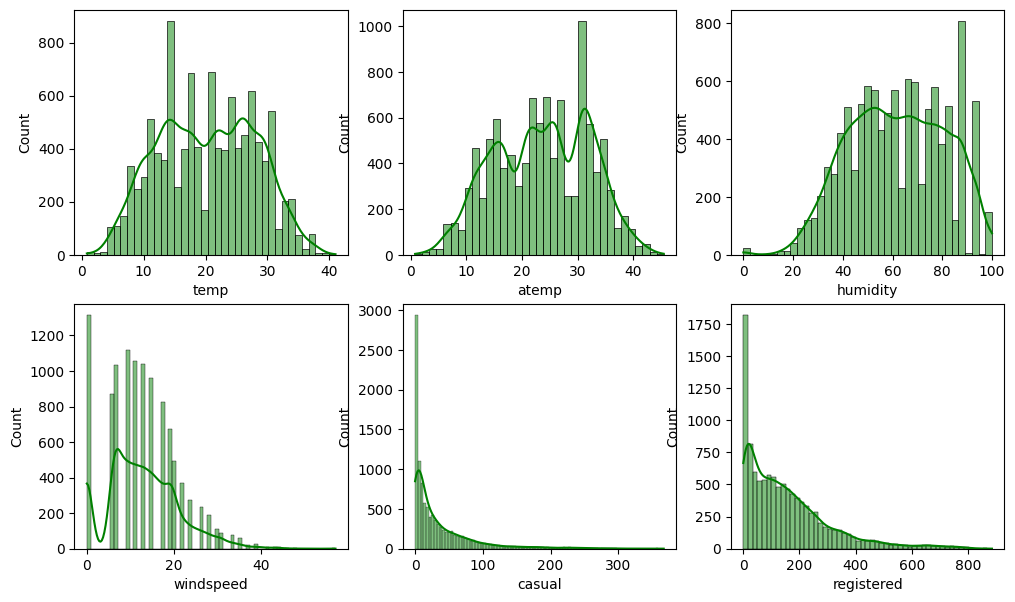

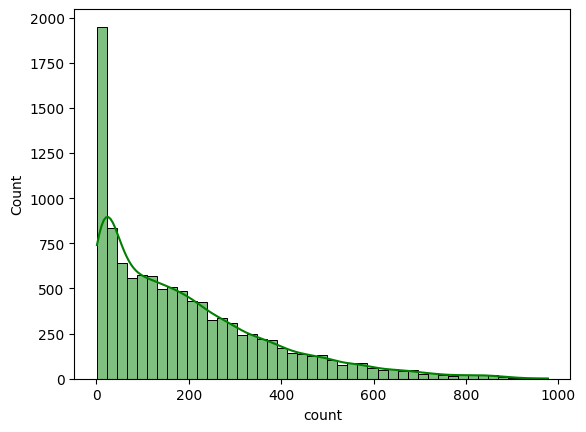

In [115]:
# understanding the distribution for numerical variables in the dataset
num_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

i = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_columns[i]], ax=axis[row, col],color = 'green', kde=True)
        i+= 1       
plt.show()
#histplot for count column
sns.histplot(df[num_columns[-1]],color = 'green' ,kde=True) 
plt.show()


Observations:

1. The columns : temp ,atemp and humidity looks like they follows Normal Distribution
2. The columns : casual ,registered and count looks like they follows Log-Normal Distribution 
3. The windspeed follows Binomial Distribution 

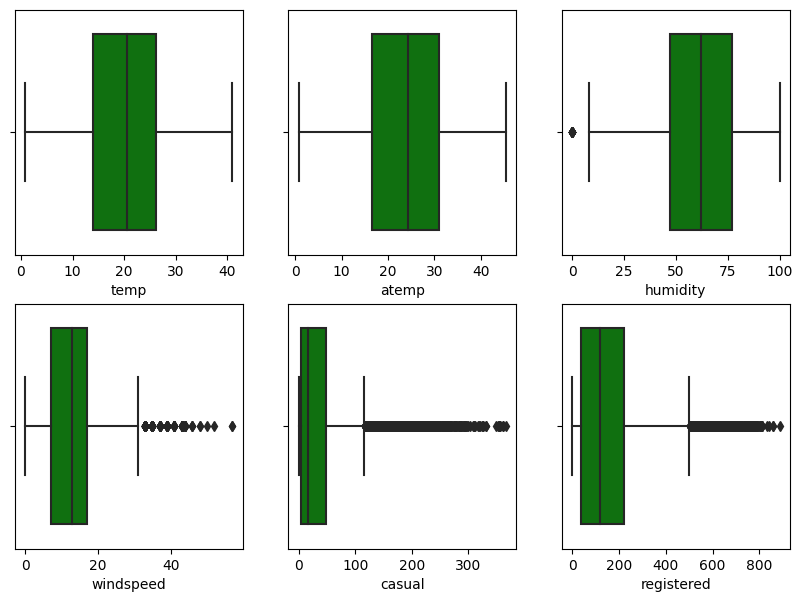

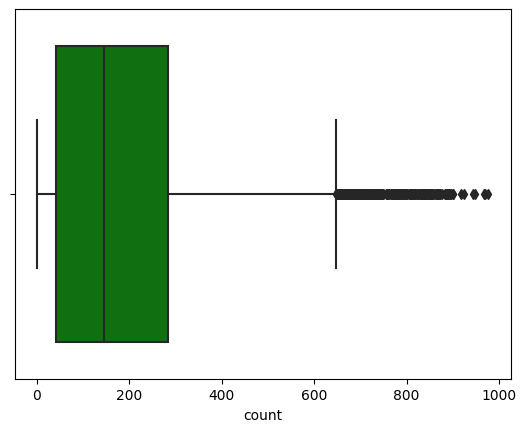

In [77]:
# BOX PLOTS on numerical columns to detect outliers
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

i = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_columns[i]], ax=axis[row, col], color = 'green')
        i += 1
        
plt.show()
#box plot for count variable
sns.boxplot(x=df[num_columns[-1]],color = 'green') 
plt.show()

Looks like humidity, casual, registered and count have outliers in the data

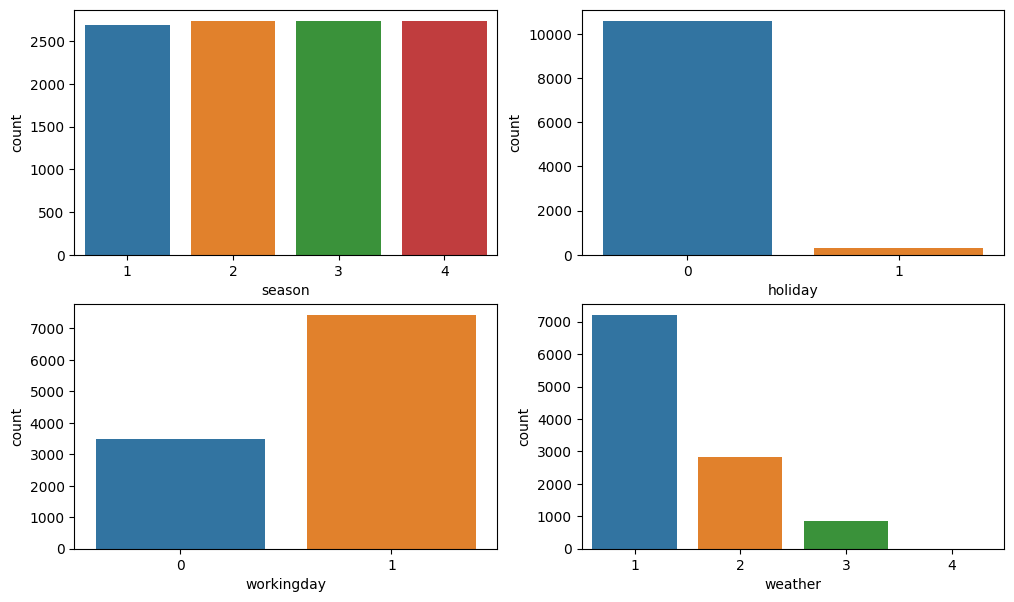

In [78]:
# COUNT PLOT for each categorical columns
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

i= 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_columns[i], ax=axis[row, col])
        i += 1      
plt.show()

Observations:

1. Looks like all season have almost equal number of rented electric cycles.
2. Whenever its a holiday more cycles are in demand.
3. Cycles are rented more on working days than non working days.
4. Highest rented bikes are on days with either Clear, Few clouds or partly cloudy weather condition 
5. The demand for cycles on days with extreme weather conditions like Heavy Rain ,Ice Pallets ,Thunderstorm ,Mist, Snow and Fog is almost zero.

# **Bi-Variate Analysis**

Relationships between important variables such as workingday and count, season and count, weather and count

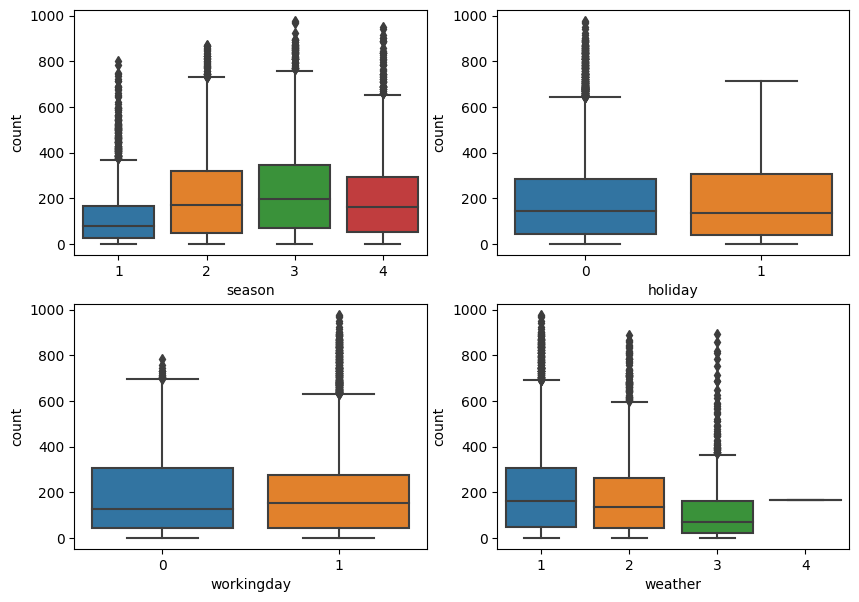

In [79]:
# BOX PLOT for all categorical variables vs count
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10 ,7))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_columns[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

Observations:
1. Whenever its a holiday more cycles are rented.
2. There is more demand for cycles in summer(2) and fall(3) seasons as compared to other seasons.
3. It is also clear from the above plot that workingday : whenever the day is holiday or weekend (1), slightly more cycles were rented.
4. Very few cycles are rented on extreme weather conditions(4).
5. All the four categorical variable have outliers.

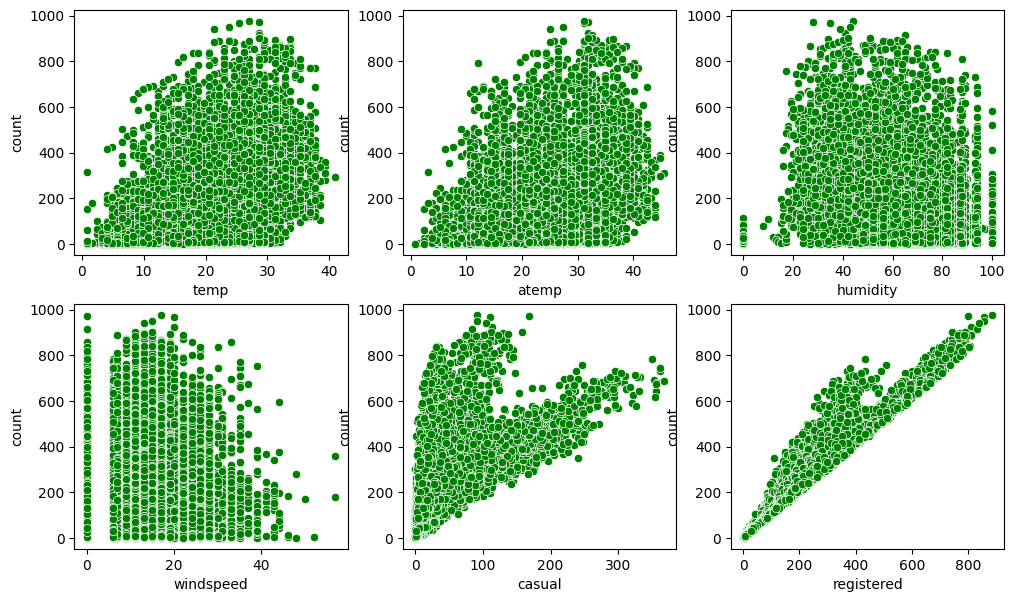

In [80]:
# plotting a SCATTER PLOT for all numerical variables vs count
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

i= 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_columns[i], y='count', ax=axis[row, col] , color = 'green')
        i += 1
        
plt.show()

Observations:

1. As we can see ,there are less number of cycles rented on days with temperature less than 10.
2. Less number of cycles are rented on days with humidity less than 18.
3. As the windspeed becomes more than 35 , less number of cycles are rented.
4. It looks like registered vs count graph follows linear relationship.

In [81]:
#understanding the correlation of variables w.r.t count
df.corr()['count']


<ipython-input-81-c6e37b628cdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64


Observation: 

1. The negative value of humidity indicates that humidity and count variable are highly correlated in a negative direction.
2. The rest of numerical variables are highly correlated with count in positive direction.


<ipython-input-82-91276c1ca717>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


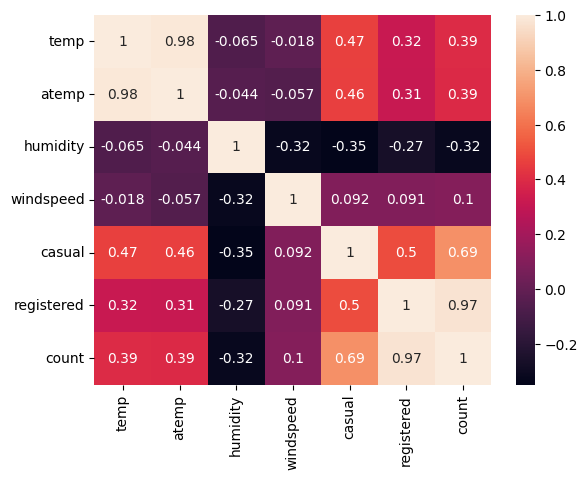

In [82]:
# HEAT MAP to understand the correlation of all numerical variables with count variable
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Hypothesis Testing**

In [83]:
#importing all the libaries
import scipy.stats as stats
import chi2_contingency

**1) 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

In [84]:
#creating the two data groups and printing them
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print("data_group1 : ",data_group1)
print("data_group2 : ",data_group2)



data_group1 :  [ 16  40  32 ... 106  89  33]
data_group2 :  [  5   2   1 ... 168 129  88]


Assumptions before conducting 2-sample ttest: 
1. Whether the two sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given two samples groups have similar variances

It is two-tail test

Checking the **NORMALITY** of the distribution for data_groups using **HISTPLOT**

<Axes: ylabel='Count'>

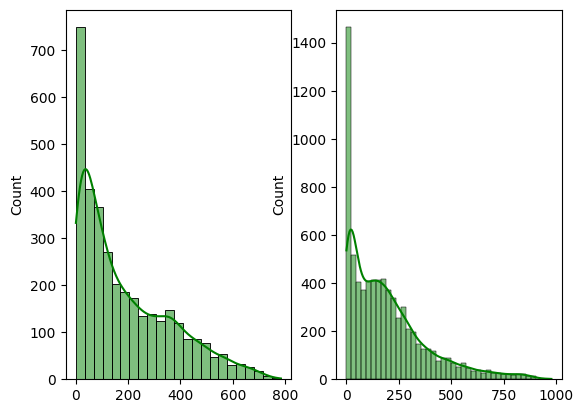

In [85]:
# histplot for data_groups
plt.subplot(1,2,1)
sns.histplot(data_group1, color = 'green', kde=True)

plt.subplot(1,2,2)
sns.histplot(data_group2,color = 'green', kde=True)

Both the data_groups follow Log-Normal Distribution as they create a Right-Skewed curve.


Now lets check whether the variance are equal or different using **LEVENE'S TEST** for the above two data_groups.
Let the choosen significnce level be 0.05


In [86]:
# HO : Variance of the two data_groups are equal
# H1 : Variance are different
test_statistics , p_value = stats.levene(data_group1, data_group2, center='mean')
print(  "p_value = ",p_value )
if p_value < 0.05:
  print ("Reject H0")
  print (" Variance are different")
else :
  print("Fail to reject H0")
  print("Variance are equal")


p_value =  0.3270389131557905
Fail to reject H0
Variance are equal




Thus, we can proceed to perform the two sample t-test with equal variances.
The two hypotheses for this particular two sample t-test are as follows:

In [87]:
#H0 : Working day has no effect on the number of cycles being rented.
#H1 :Working day has effect on the number of cycles being rented.
test_statistics , p_value = stats.ttest_ind(data_group1, data_group2, equal_var=True)
print(  "p_value = ",p_value  )
if p_value < 0.05:
  print ("Reject H0")
  print (" Working day has effect on the number of cycles being rented.")
else :
  print("Fail to reject H0")
  print("Working day has no effect on the number of cycles being rented.")



p_value =  0.22644804226361348
Fail to reject H0
Working day has no effect on the number of cycles being rented.


RESULT: From the above 2-sample t-test, we can say that there is no sufficient evidence to say that Working days has effect on the number of cycles being rented.

**2) ANNOVA to check if No. of cycles rented is similar or different in different:**
**1. weather**
**2. season** 

1. ANNOVA TEST FOR ALL 4 WEATHER CONDITIONS

In [88]:
# Creating data_groups for all the four seasons in the dataset
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values


Assumptions before conducting ttest: 
1. Whether the sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given samples groups have similar variances

Since there are more than 2 data_groups we do ANNOVA TESING

Checking the **NORMALITY** of the distribution of data_groups using **HISTPLOT**

<Axes: ylabel='Count'>

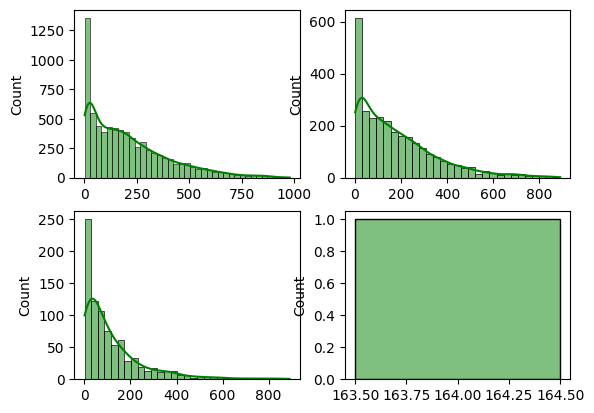

In [89]:
# histplot for data_groups
plt.subplot(2,2,1)
sns.histplot(gp1, color = 'green', kde=True)

plt.subplot(2,2,2)
sns.histplot(gp2,color = 'green', kde=True)

plt.subplot(2,2,3)
sns.histplot(gp3, color = 'green', kde=True)

plt.subplot(2,2,4)
sns.histplot(gp4,color = 'green', kde=True)

The data_groups follow Log-Normal Distribution as they create a Right-Skewed curve. The fourth weather condition is extreme so we can see that there are very very few cycles rented.

Now lets check whether the variance are equal or different using **LEVENE'S TEST** for the above data_groups. Let the choosen significnce level be 0.05

In [90]:
# HO : Variances are equal
# H1 : Variances are different
test_statistics , p_value = stats.levene(gp1, gp2, gp3, gp4)
print(  "p_value = ",p_value )
if p_value < 0.05:
  print ("Reject H0")
  print ("Variances are different")
else :
  print("Fail to reject H0")
  print("Variances are equal")

p_value =  3.504937946833238e-35
Reject H0
Variances are different


The VARIANCE for atleast one weather group is different. Hence our assumption is failing.
Now, we can proceed to perform ANNOVA test :

In [91]:
#H0 :Number of cycles rented is similar in all 4 weather.
#H1 :Number of cycles rented is different in all 4 weather.
test_statistics , p_value = stats.f_oneway(gp1, gp2, gp3, gp4)
print(  "p_value = ",p_value  )
if p_value < 0.05:
  print ("Reject H0")
  print ("Number of cycles rented is different in all 4 seasons")
else :
  print("Fail to reject H0")
  print("Number of cycles rented is similar in all 4 seasons")

p_value =  5.482069475935669e-42
Reject H0
Number of cycles rented is different in all 4 seasons


2. ANNOVA TEST FOR SEASONS


In [92]:
# Creating data_groups for all the four seasons in the dataset
gp1 = df[df['season']==1]['count'].values
gp2 = df[df['season']==2]['count'].values
gp3 = df[df['season']==3]['count'].values
gp4 = df[df['season']==4]['count'].values
print("data_group1 : ",gp1)
print("data_group2 : ",gp2)
print("data_group1 : ",gp3)
print("data_group2 : ",gp4)

data_group1 :  [ 16  40  32 ... 223 148  54]
data_group2 :  [  6   4   7 ... 276 291 125]
data_group1 :  [ 68  31  13 ... 349 229 123]
data_group2 :  [130  58  67 ... 168 129  88]


Assumptions before conducting ttest: 
1. Whether the sample data groups are independent.
2. Whether the data elements in respective groups follow any normal distribution.
3. Homogeneity assumption: Whether the given samples groups have similar variances

Since there are more than 2 data_groups we do ANNOVA TESING

Checking the **NORMALITY** of the distribution of data_groups using **HISTPLOT**

<Axes: ylabel='Count'>

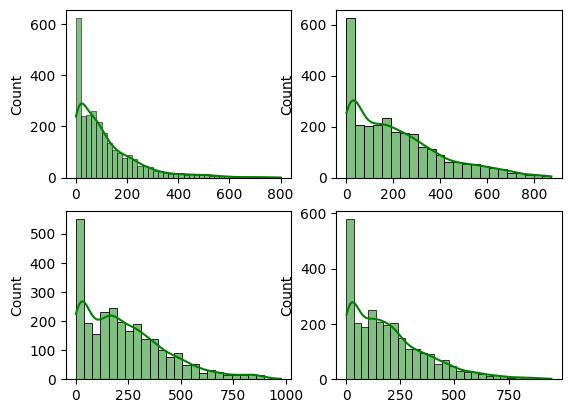

In [93]:
# histplot for data_groups
plt.subplot(2,2,1)
sns.histplot(gp1, color = 'green', kde=True)

plt.subplot(2,2,2)
sns.histplot(gp2,color = 'green', kde=True)

plt.subplot(2,2,3)
sns.histplot(gp3, color = 'green', kde=True)

plt.subplot(2,2,4)
sns.histplot(gp4,color = 'green', kde=True)

The data_groups follow Log-Normal Distribution as they create a Right-Skewed curve.

Now lets check whether the variance are equal or different using **LEVENE'S TEST** for the above two data_groups. Let the choosen significnce level be 0.05

In [94]:
# HO : Variances are equal
# H1 : Variances are different
test_statistics , p_value = stats.levene(gp1, gp2, gp3, gp4)
print(  "p_value = ",p_value )
if p_value < 0.05:
  print ("Reject H0")
  print ("Variances are different")
else :
  print("Fail to reject H0")
  print("Variances are equal")

p_value =  1.0147116860043298e-118
Reject H0
Variances are different


The VARIANCE for atleast one season group is different. Hence our assumption is failing.
Now, we can proceed to perform ANNOVA test :

In [95]:
#H0 :Number of cycles rented is similar in all 4 seasons.
#H1 :Number of cycles rented is different in all 4 seasons.
test_statistics , p_value = stats.f_oneway(gp1, gp2, gp3, gp4)
print(  "p_value = ",p_value  )
if p_value < 0.05:
  print ("Reject H0")
  print ("Number of cycles rented is different in all 4 seasons")
else :
  print("Fail to reject H0")
  print("Number of cycles rented is similar in all 4 seasons")

p_value =  6.164843386499654e-149
Reject H0
Number of cycles rented is different in all 4 seasons


RESULT : This implies that Number of cycles rented is not similar in different weather and season conditions.


**3) CHI-SQUARE TEST to check if Weather is dependent on the season**

A chi-square (Χ2) test of independence is a type of Pearson’s chi-square test. We compare the test statistic to a critical value from a chi-square distribution to decide whether it’s big enough to reject the null hypothesis that the two variables are unrelated. 

Now lets start with creating a crosstab 

In [96]:
crosstab = pd.crosstab(df['season'], df['weather'])
crosstab

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [98]:
# HO : Weather is independent of the season
# H1 : Weather is dependent of the season

test_statistic, p_value, dof, expected = chi2_contingency(crosstab)
print ("test_statistic =", test_statistic)
print("p_value =",p_value)
print("dof =",dof)
print("expected obseravtions =", expected)

if p_value < 0.05:
  print ("Reject H0")
  print ("Weather is dependent of the season")
else :
  print("Fail to reject H0")
  print("Weather is independent of the season")

test_statistic = 49.158655596893624
p_value = 1.549925073686492e-07
dof = 9
expected obseravtions = [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject H0
Weather is dependent of the season


RESULT : Weather is dependent on season 
         

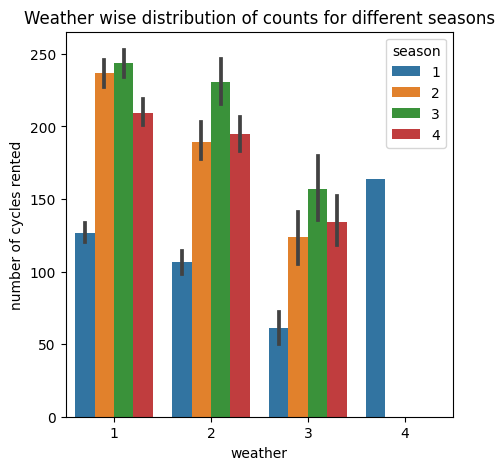

In [111]:
# understanding the weather wise distribution of number of cycles rented for different seasons
fig,ax=plt.subplots(figsize=(5,5))
#Barplot for weather distribution of counts
sns.barplot(data=df,x='weather',y='count',hue='season', )
plt.ylabel("number of cycles rented")
ax.set_title('Weather wise distribution of counts for different seasons')
plt.show()

Observations: 
1. the number of rented cycles are maximum on days with Clear, Few clouds and partly cloudy in summer and fall seasons.
2. The least number of cycles are rented on days having Light Snow, Light Rain, Thunderstorm, Scattered clouds in spring season.
3. Almost no cycles where rented on days with Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog (except in summer season).

# **Insights:**

1. With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
2. With a significance level of 0.05, the number of bikes being rented are not similar for different seasons and weather.
3. Weather and Seasons variables are dependent on each other.
4. Whenever its a holiday more bikes are rented.
5. Maximum number of vehicles are been rented in Fall and Summer season.
6. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
7. Very few cycles are rented on extreme weather conditions(4) 
8. There are less number of cycles rented on days with temperature less than 10.
9. As the windspeed becomes more than 35 , less number of cycles are rented because too windy days makes it uncomfortable to commute on cycles.
10. Less number of cycles are rented on days with humidity less than 18.
11. Demand for cycles depends on humidity ,temperature, seasons, weather conditions.
12. There are 10886 rows in data and 12 different features. 
13. There are 4 unique seasons and weather in the dataset with 24.6% of electric cycle being rented in Fall season and 66% of electrice vehhicles being rented on Clear, Few cloud or partly cloudy days.
14. Most of the cycles where rented on working days i.e around 68% than non-working days may be people prefer to rest on non-working days.


# **Recommendations :**

1. Demands for rented cycles is more during summer and fall seasons , so the company needs to stock more number of cycles.
2. Demands for rented cycles is more on working days(neither weekend nor holidays). So the company needs to stock more number of cycles to meet the demand.
3. In very low humid days, company should have less bikes in the stock to be rented.
4. Whenever temprature is less than 10 or in very cold days, company should have less cycles in stock.
5. Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
6. Using datetime column we can analyze the peak hours and depending on that we can understand when to increase the stock.
7.  Easy accessibility of shared rented cycles can also help in profit of the company